# Benchmarking Our Algorithm against others

In [2]:
import sys
sys.path.append('../')
from panav.environment.env import MultiTunnelEnv
from panav.hybrid import HybridGraph
from panav.util import flowtime,makespan

import numpy as np
from matplotlib import pyplot as plt

import pickle as pkl

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


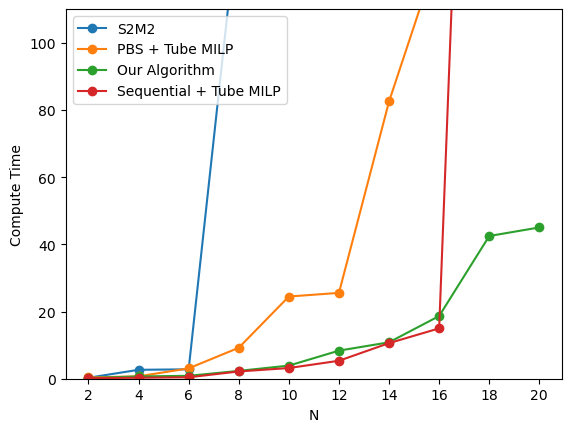

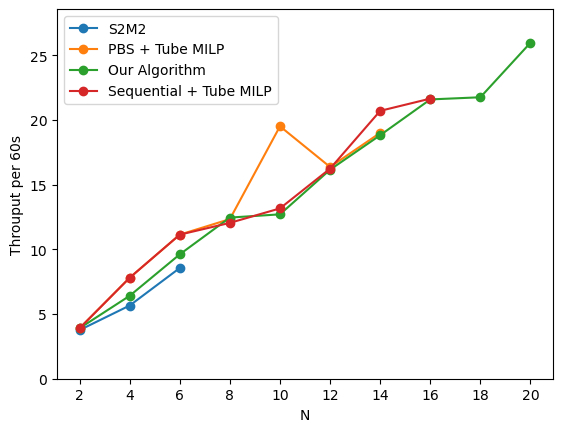

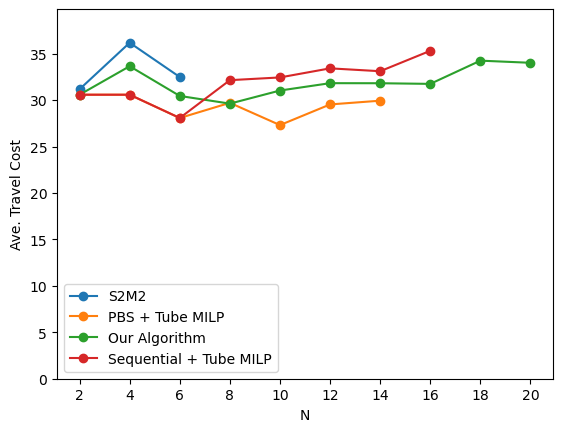

In [66]:

env_name = "MultiTunnel"

# Save checkpoint data
with open("./data/{}.pkl".format(env_name),'rb') as fp:
    results = pkl.load(fp)

TIMEOUT = 100
# Visualize the simulation results
metrics = {
        #     "Makespan": lambda result: [makespan(result['plan'])] if result['plan'] else [],
        #    "Flowtime": lambda result: [flowtime(result['plan'])] if result['plan'] else [],
        "Compute Time": lambda result: [result['time']] if result['plan'] is not None or result['time']>TIMEOUT else [],
           "Throuput per 60s": lambda result: [result['N_agent']/makespan(result['plan']) * 60]  if result['plan'] else [],
           "Ave. Travel Cost": lambda result: [flowtime(result['plan'])/result['N_agent']] if result['plan'] else []
           }

legends = {
    "S2M2": "S2M2",
    "PBS_Tube": "PBS + Tube MILP",
    "TAHP": "Our Algorithm",
    "Seq_Tube": "Sequential + Tube MILP"
}

noplot = {"Seq_Temp_Obs"}

performance = {}

for result in results:
    # print(result['plan'][-1])
    alg = result['alg_name']
    if alg not in performance:
        performance[alg] = {}
        performance[alg]['n_agents'] = []
    
    performance[alg]['n_agents'].append(result['N_agent'])

    for metric, eval in metrics.items():
        if metric not in performance[alg]:
            performance[alg][metric] = []
        
        performance[alg][metric]+=eval(result)
from matplotlib import pyplot as plt

for metric in metrics:
    
    plt.figure()
    plt.ylabel(metric)
    plt.xlabel("N")
    # plt.ylim((0,20))
    ymax = 0
    xticks = set()
    for alg in performance:
        if alg in noplot:
            continue
        x = performance[alg]['n_agents']
        val = performance[alg][metric]
        l = min(len(x),len(val))
        if l>0:
            plt.plot(x[:l],val[:l], label = legends[alg],marker = "o")
            xticks.update(x[:l])
            ymax = max(ymax,max(performance[alg][metric]))


    if metric == "Compute Time":
        ymax = TIMEOUT            

    plt.xticks(list(xticks))
    plt.ylim(0.0,ymax*1.1)
    plt.legend()
    plt.show()